In [1]:
## Functions

import sys,os
import copy
path = os.path.abspath('../dev/')
if path not in sys.path:
    sys.path.append(path)

import bib_mri as FW
import numpy as np
import scipy as scipy
import scipy.misc as misc 
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from numpy import genfromtxt
import platform

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

def sign_extract(seg, resols): #Function for shape signature extraction
    splines = FW.get_spline(seg,smoothness)

    sign_vect = np.array([]).reshape(0,points) #Initializing temporal signature vector
    for resol in resols:
        sign_vect = np.vstack((sign_vect, FW.get_profile(splines, n_samples=points, radius=resol)))
    
    return sign_vect

def sign_fit(sig_ref, sig_fit): #Function for signature fitting
    dif_curv = []
    for shift in range(points):
        dif_curv.append(np.abs(np.sum((sig_ref - np.roll(sig_fit[0],shift))**2)))
    return np.apply_along_axis(np.roll, 1, sig_fit, np.argmin(dif_curv))

print "Python version: ", platform.python_version()
print "Numpy version: ", np.version.version
print "Scipy version: ", scipy.__version__
print "Matplotlib version: ", mpl.__version__

Python version:  2.7.13
Numpy version:  1.12.1
Scipy version:  0.19.0
Matplotlib version:  2.0.2


In [2]:
#Loading labeled segmentations
seg_label = genfromtxt('../../dataset/Seg_Watershed/watershed_label.csv', delimiter=',').astype('uint8')

list_masks_wt = seg_label[np.logical_or(seg_label[:,1] == 0, seg_label[:,1] == 1), 0]#[32:33] #Extracting segmentations
list_labels_wt = seg_label[np.logical_or(seg_label[:,1] == 0, seg_label[:,1] == 1), 1]#[32:33] #Extracting labels
print list_masks_wt.shape

(147,)


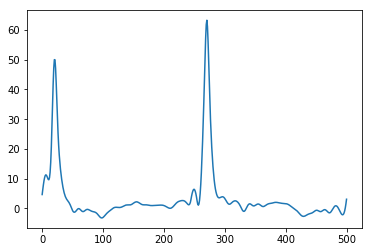

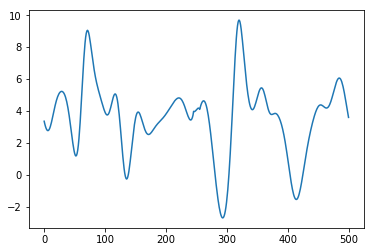

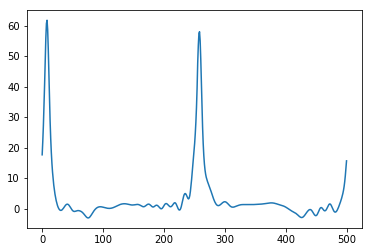

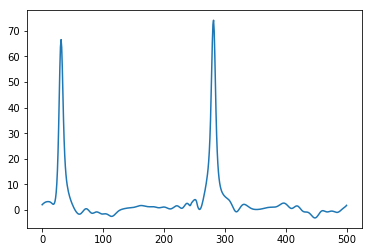

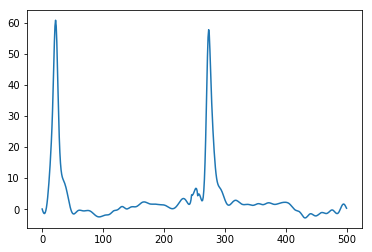

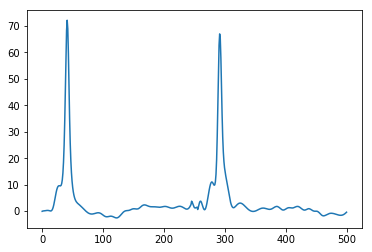

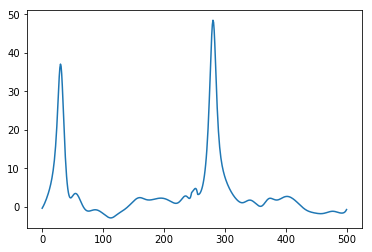

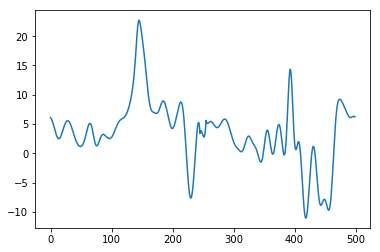

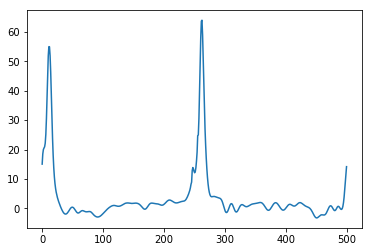

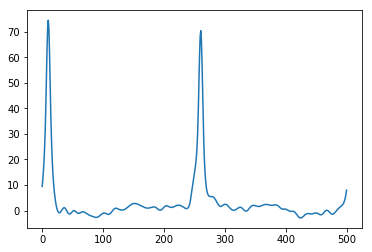

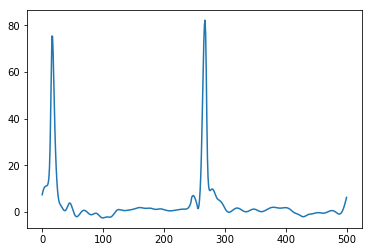

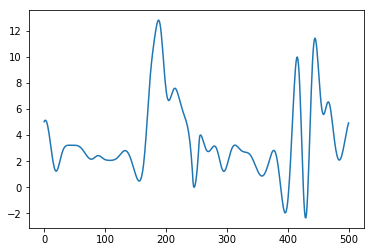

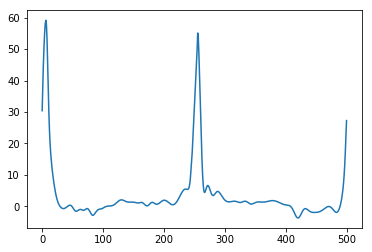

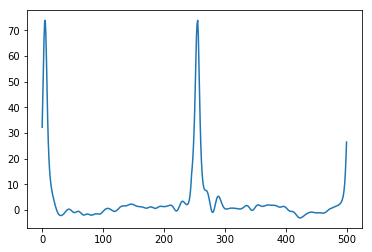

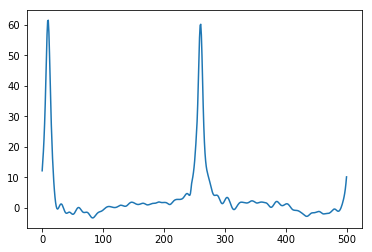

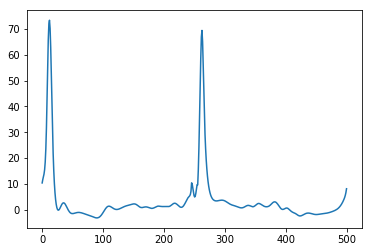

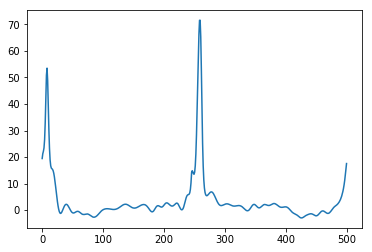

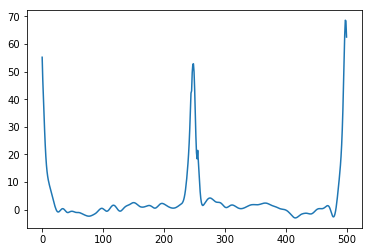

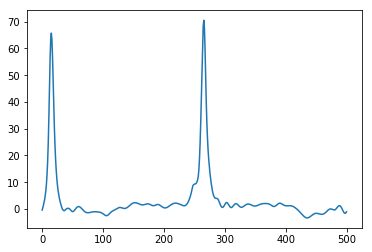

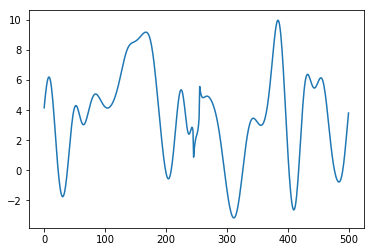

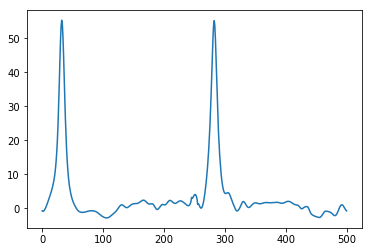

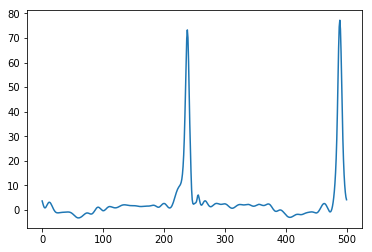

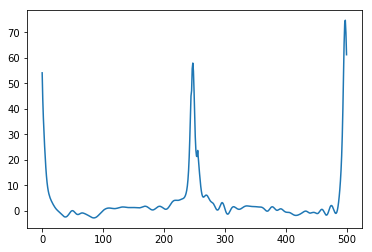

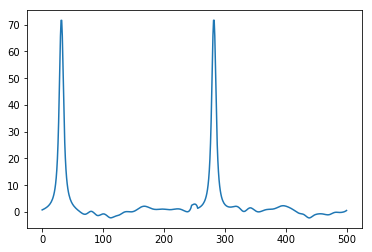

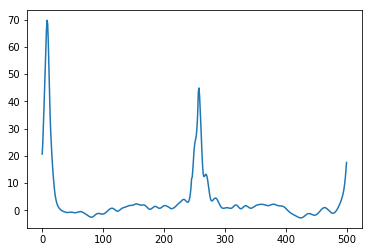

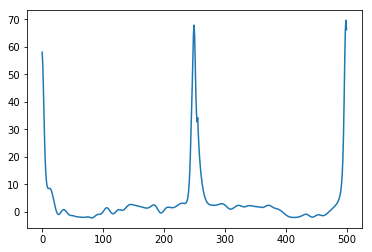

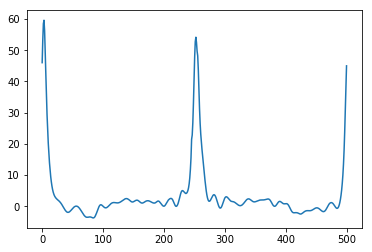

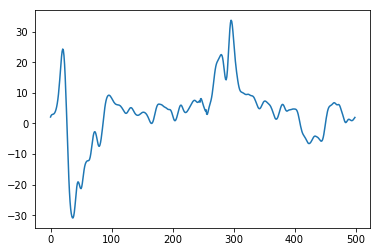

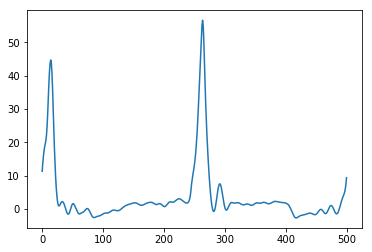

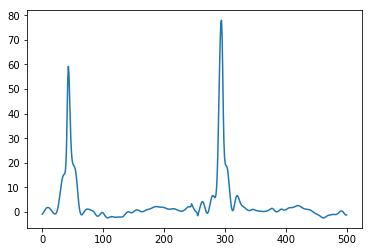

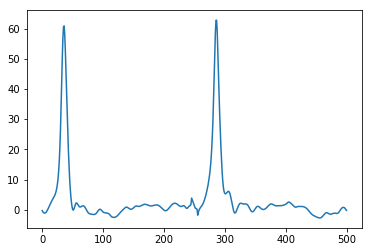

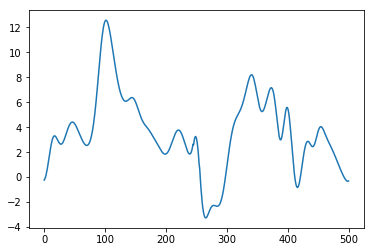

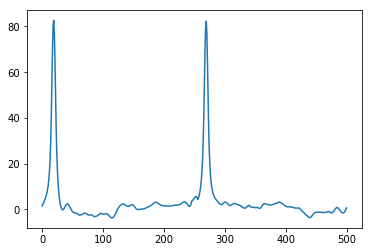

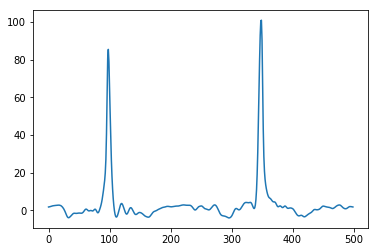

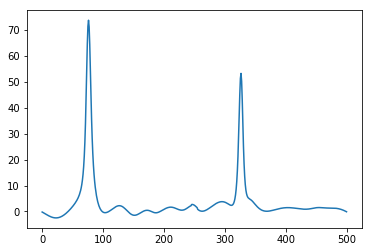

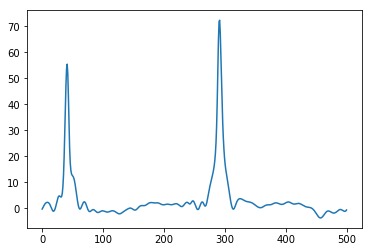

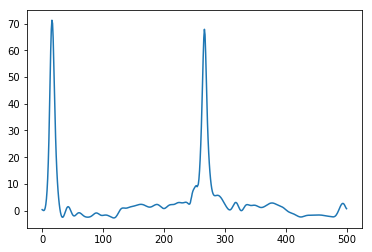

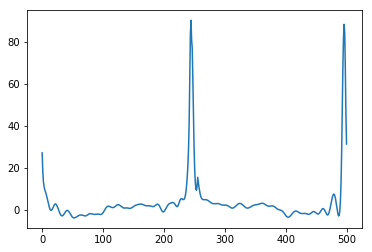

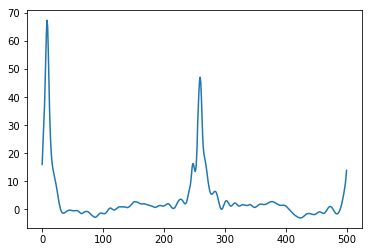

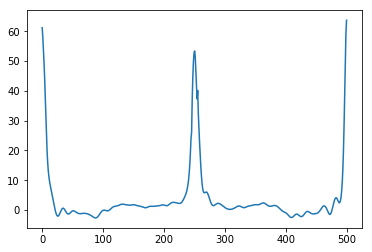

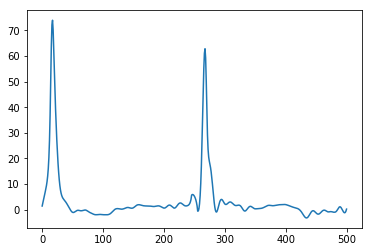

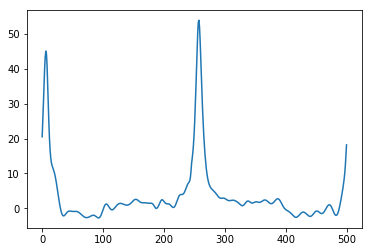

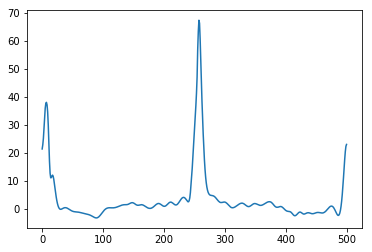

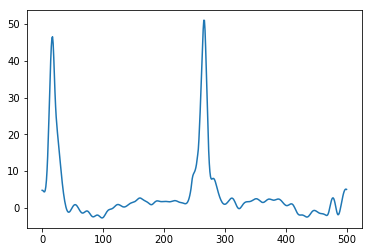

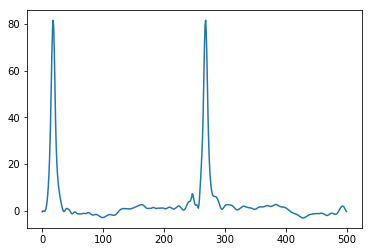

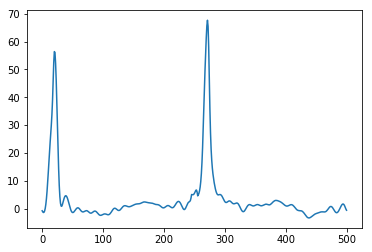

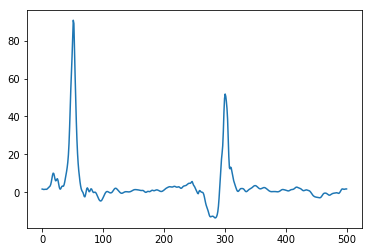

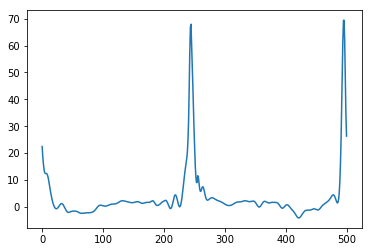

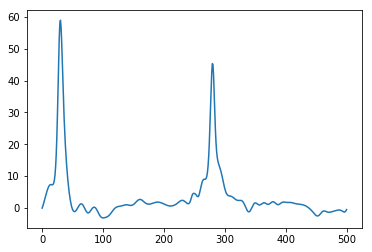

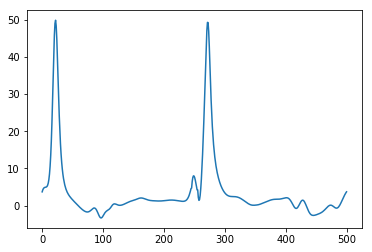

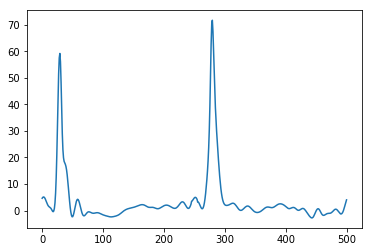

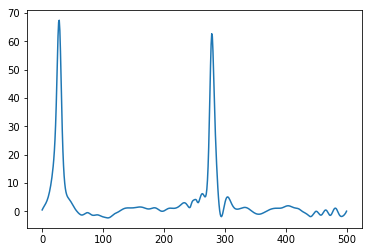

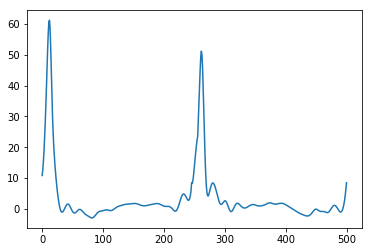

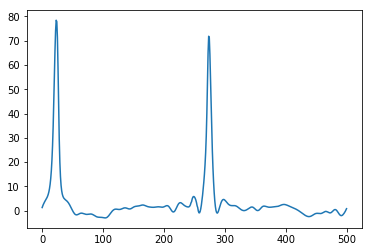

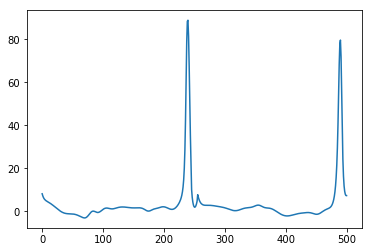

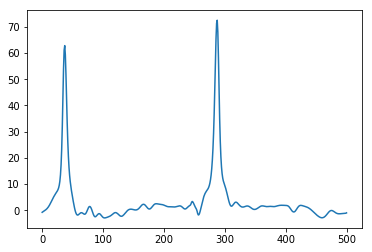

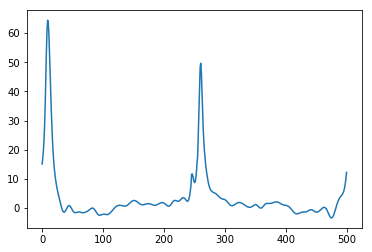

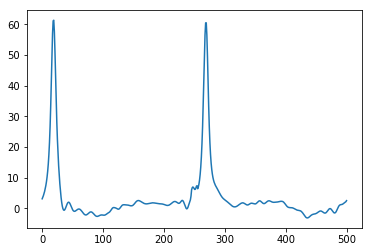

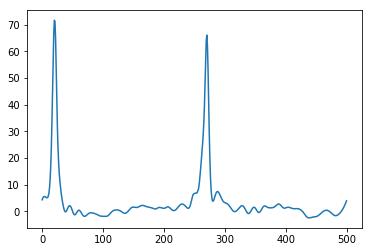

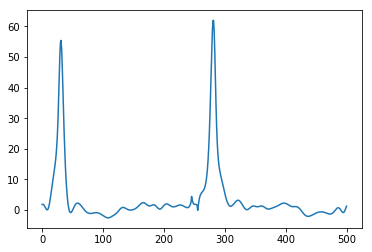

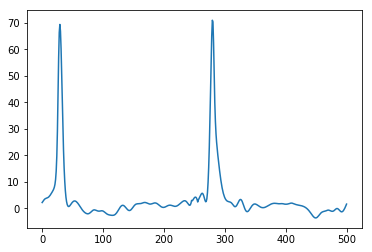

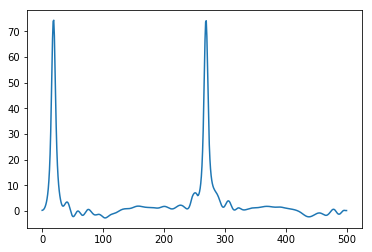

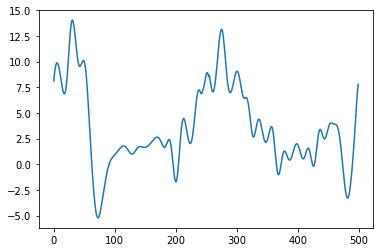

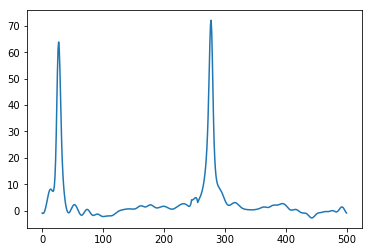

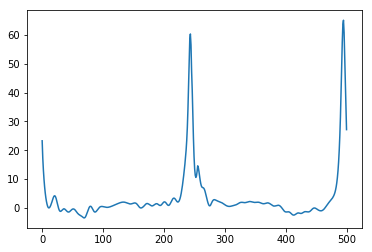

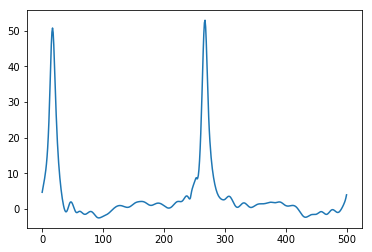

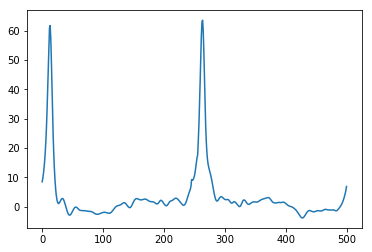

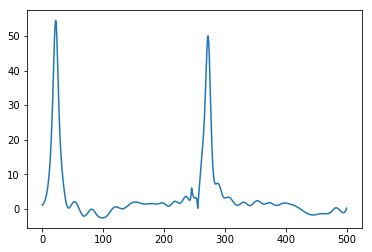

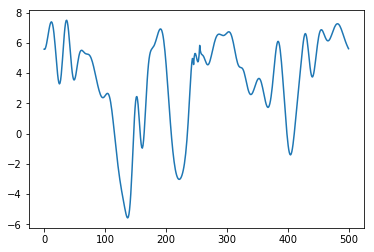

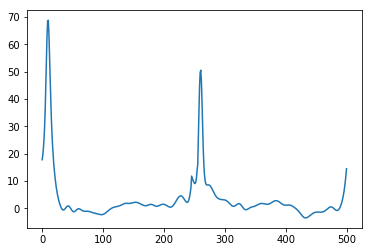

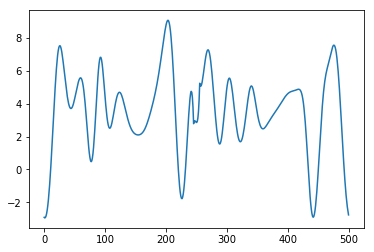

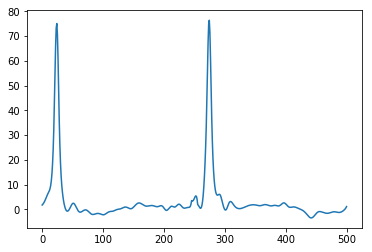

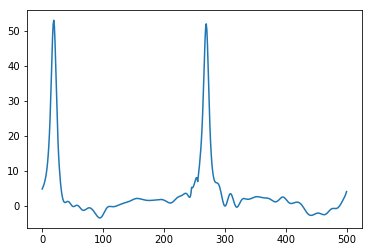

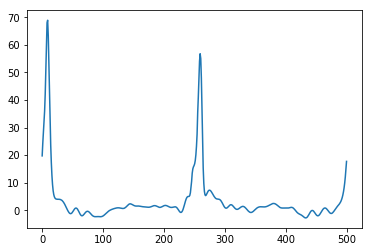

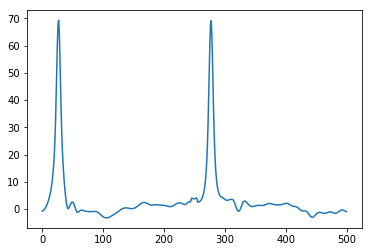

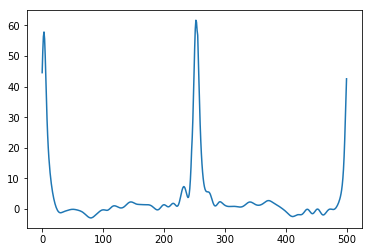

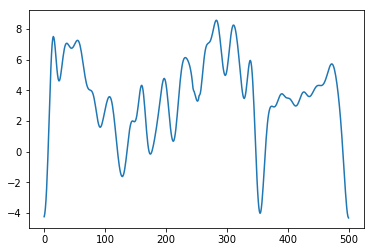

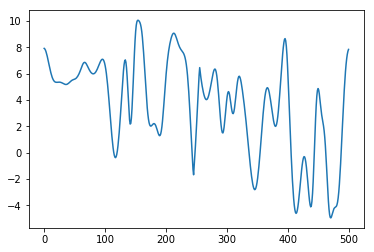

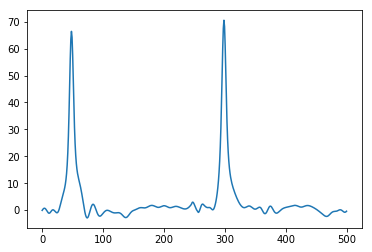

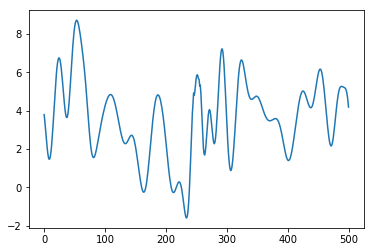

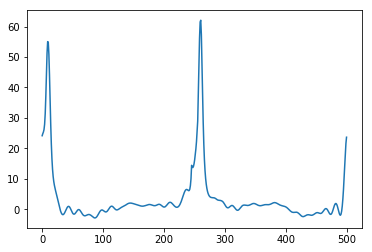

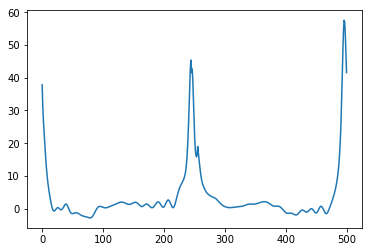

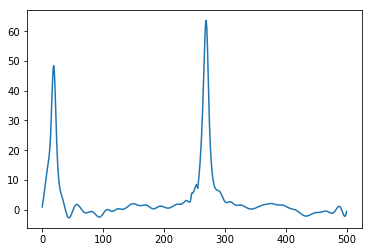

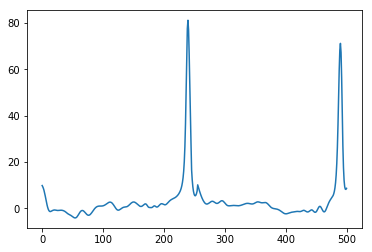

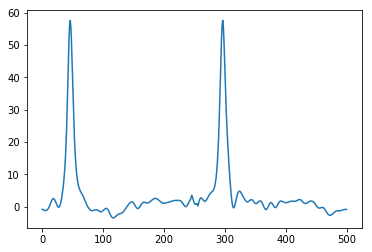

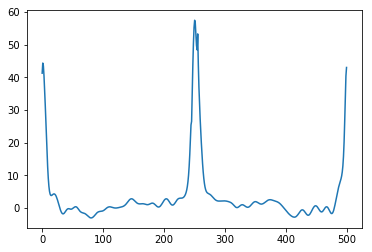

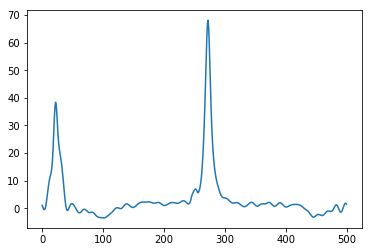

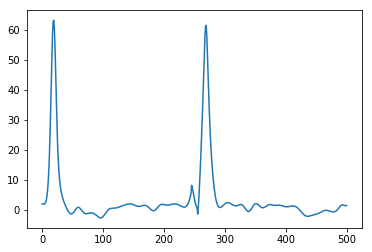

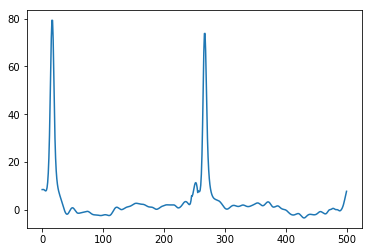

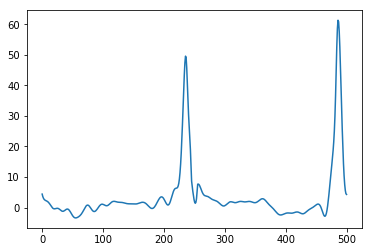

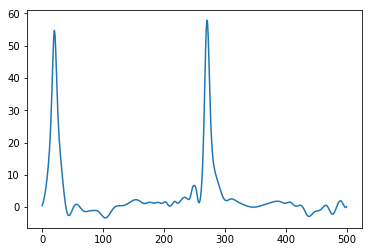

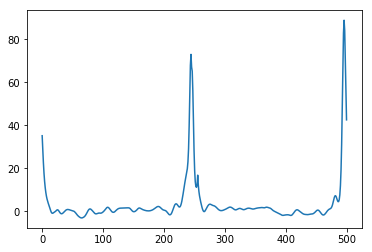

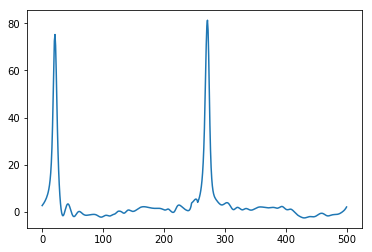

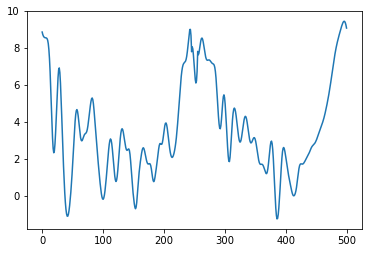

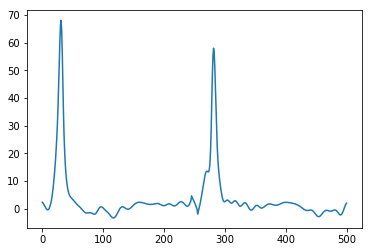

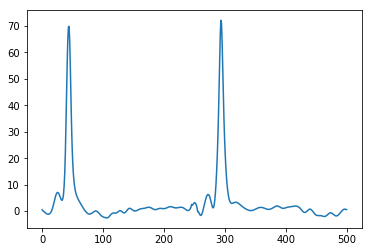

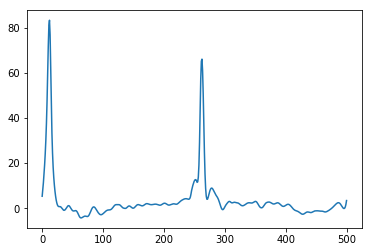

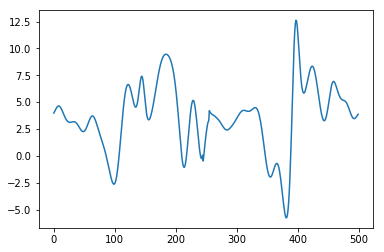

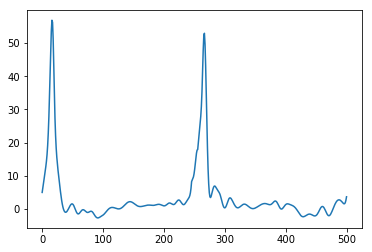

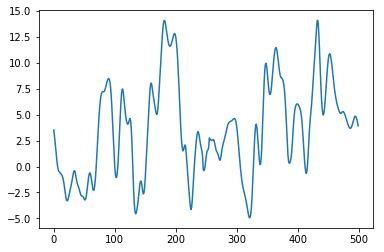

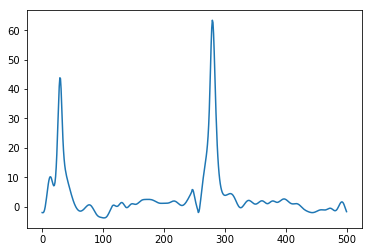

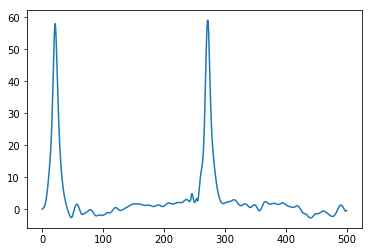

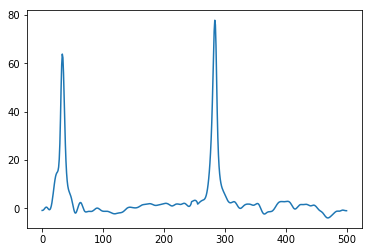

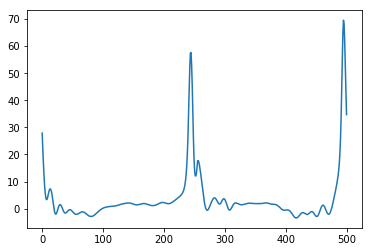

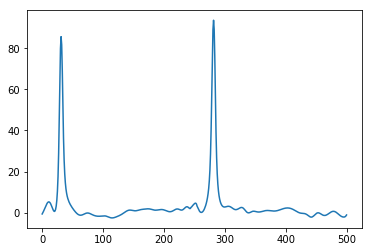

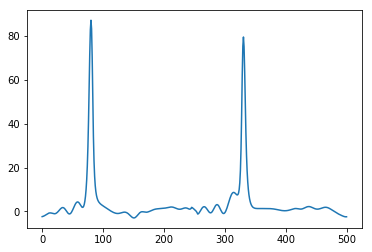

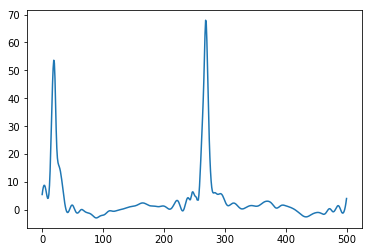

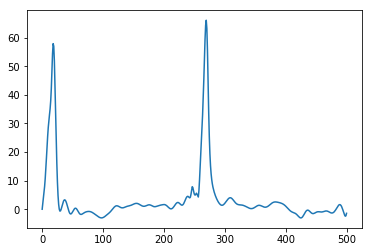

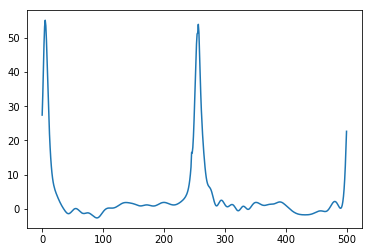

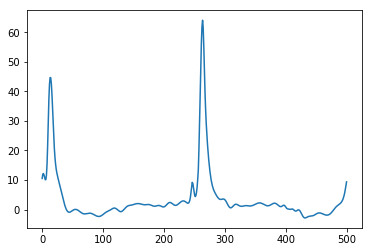

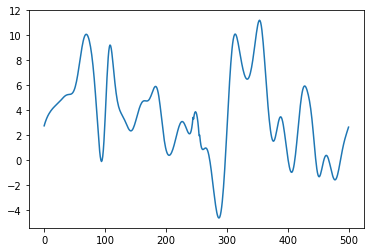

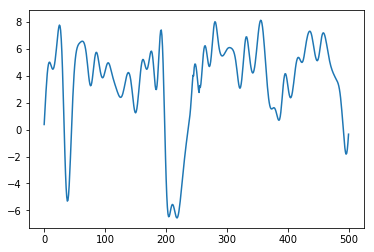

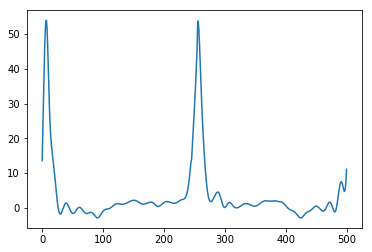

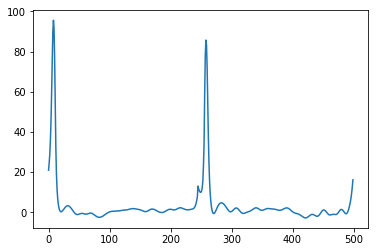

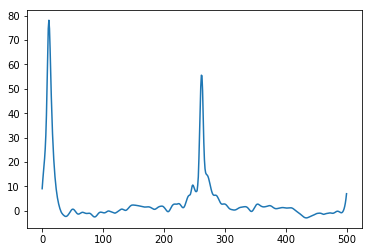

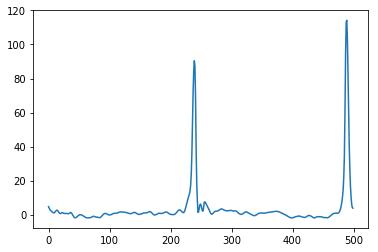

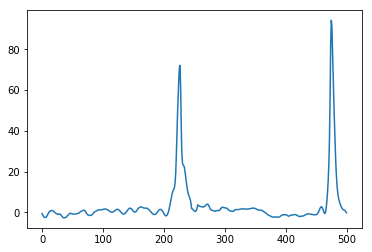

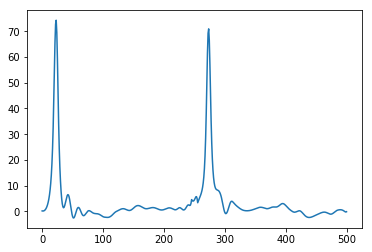

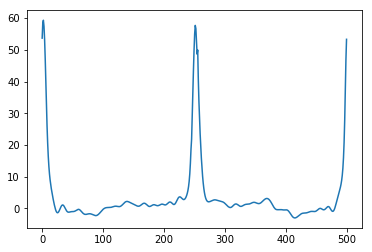

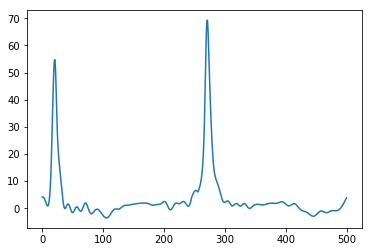

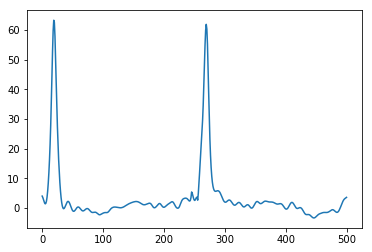

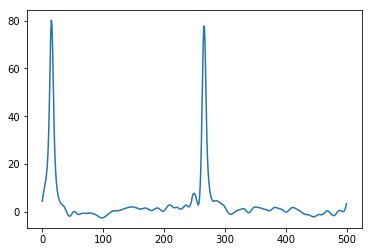

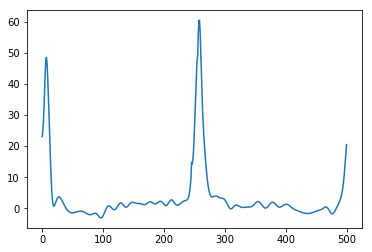

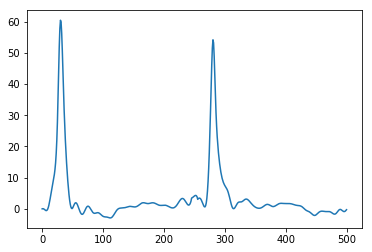

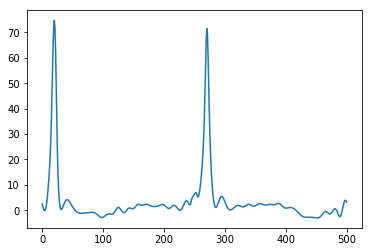

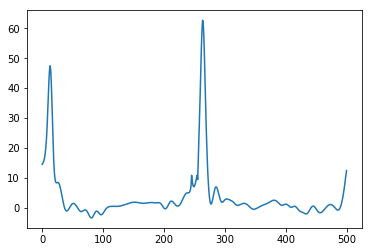

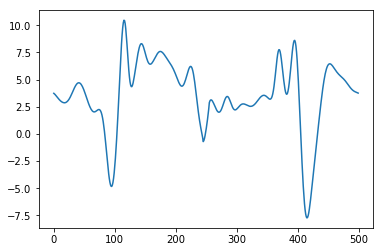

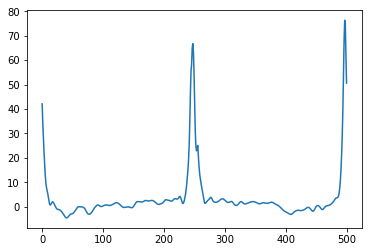

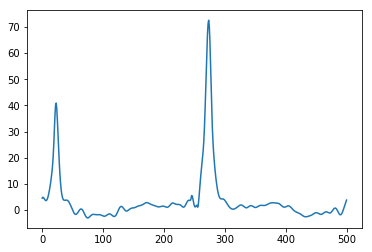

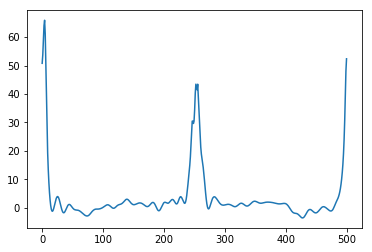

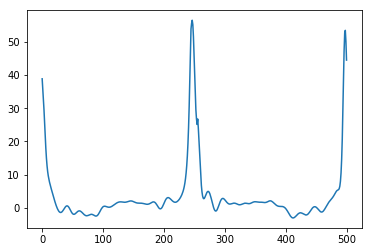

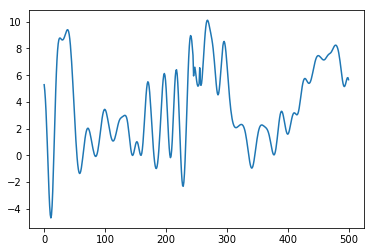

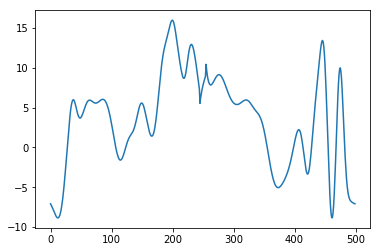

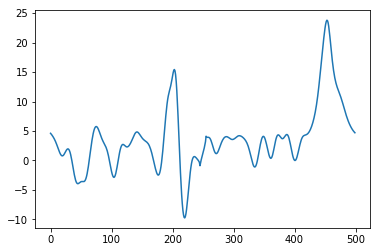

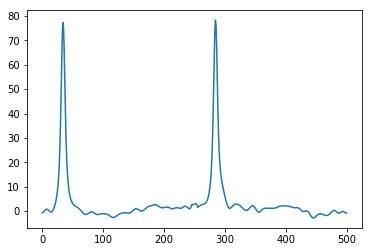

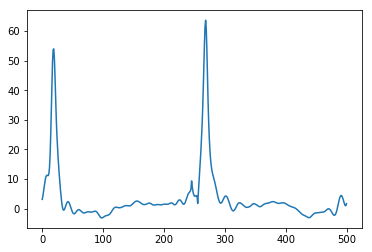

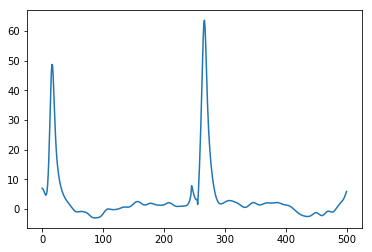

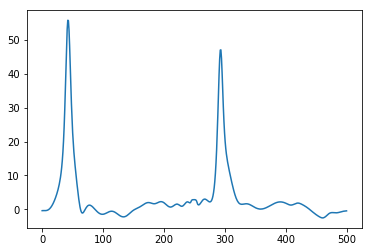

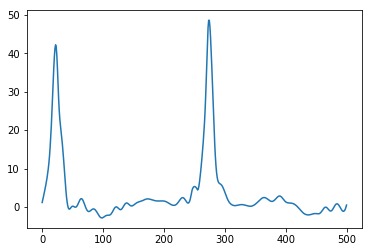

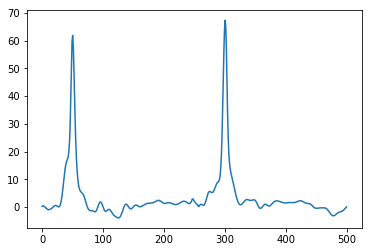

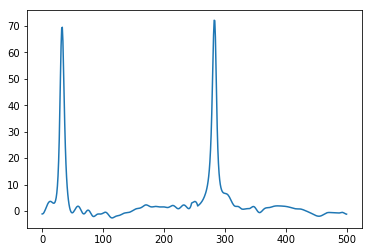

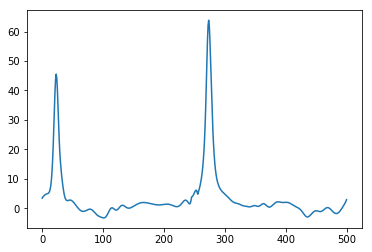

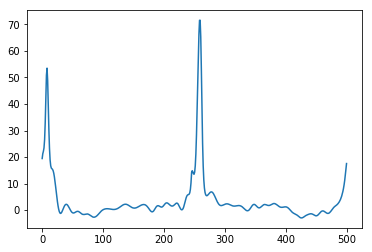

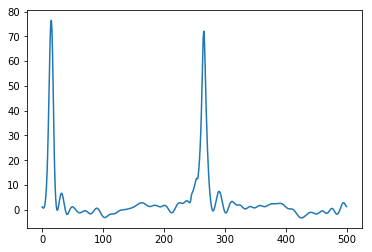

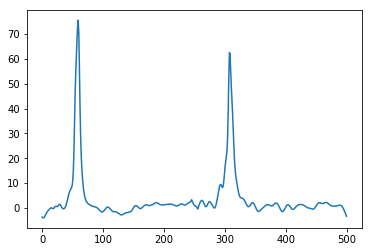

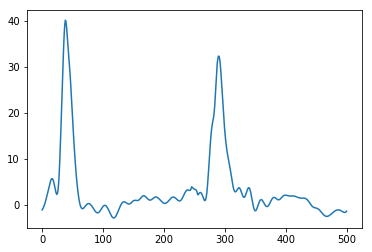

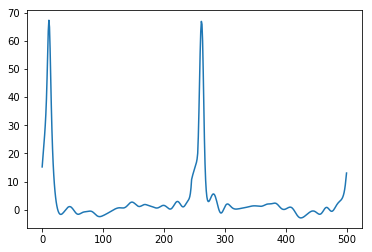

In [3]:
smoothness = 700 #Smoothness
degree = 5 #Spline degree
fit_res = 0.35
#resols = np.arange(0.01,0.5,0.01) #Signature resolutions
#resols = np.insert(resols,0,fit_res) #Insert resolution for signature fitting
resols = (0.49,)
points = 500 #Points of Spline reconstruction

for ind, mask in enumerate(list_masks_wt):
    #Loading correct mask
    mask_pn = np.load('../../dataset/Seg_Watershed/mask_wate_{}.npy'.format(mask))
    profile = sign_extract(mask_pn, resols) #Function for shape signature extraction
    
    plt.figure()
    plt.plot(profile[0])
    plt.show()

In [ ]:
print profile.shape
plt.figure()
plt.plot(profile[0])
plt.title("Correct signatures")
plt.show()

In [ ]:
dif_prof = np.abs(profile - np.roll(profile,1)) > np.pi
print dif_prof
plt.figure()
plt.plot(dif_prof[0])
plt.title("Correct signatures")
plt.show()

In [ ]:
#print np.where(dif_prof[0])
ind_start = np.where(dif_prof[0])[0][::2]
print ind_start
ind_end = np.where(dif_prof[0])[0][1::2]
print ind_end
indexes = []
for in1, in2 in zip(ind_start,ind_end):
    indexes = np.append(indexes,np.r_[in1:in2])
print indexes.astype(int)
zeros = np.zeros(500).astype(int)
zeros[indexes.astype(int)] = 360
print zeros
plt.figure()
plt.plot(dif_prof[0])
plt.plot(zeros)
plt.title("Correct signatures")
plt.show()

In [ ]:
print profile[0,140], profile[0,141]+360
new_profile = profile[0] + zeros
plt.figure()
plt.plot(new_profile)
plt.plot(profile[0])
plt.title("Correct signatures")
plt.show()